# good old importing

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from random import randint  
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Activation,
    Flatten,
    MaxPool2D,
    Conv2D,
)

# ATTENTION !!!!!!!!!

### I'm running this on the GPU (it's faster) if you want to do it follow this link : https://www.tensorflow.org/install/pip#hardware_requirements
### Disclaimer : setting things up takes some time :sob:

In [19]:
# tf version needs to be < 2.11
tf.__version__

'2.10.0'

In [20]:
# checking if the gpu is detected
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
# loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [22]:
# classes dict
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

# data dimensions

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
y_train.shape

(50000, 1)

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
y_test.shape

(10000, 1)

# visualisation

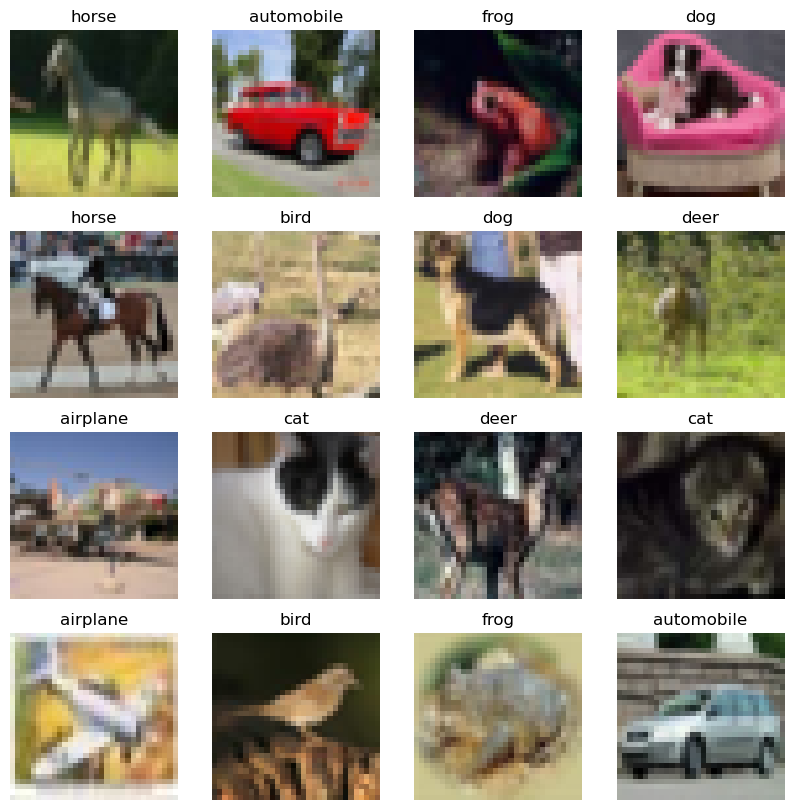

In [27]:
# getting 16 random examples from the training set
plt.figure(figsize=(10,10))
for i in range(1,17):
        index=randint(0,49999)
        plt.subplot(4,4,i)
        plt.imshow(X_train[index])
        plt.axis("off")
        plt.title(labels[y_train[index][0]])

# data pre processing

In [28]:
# scaling to avoid outliers and simplify them to float values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train=X_train/255
X_test=X_test/255

In [29]:
# ignore this
# encoding labels
#y_train_enc=to_categorical(y_train,10,dtype=int)
#y_test_enc=to_categorical(y_test,10,dtype=int)

# Model building

In [30]:
model=Sequential()

In [31]:
# 32 convolutions
# Conv2D => BatchNormalization => MaxPool2D => Dropout
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(32, 32, 3),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 32 convolutions
# Conv2D => BatchNormalization => MaxPool2D => Dropout
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 64 convolutions
# Conv2D => BatchNormalization => MaxPool2D => Dropout
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 128 convolutions
# Conv2D => BatchNormalization => MaxPool2D => Dropout
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Flatten => Dense => Dense
# flatten dimensions to a  single vector
model.add(Flatten())

# fully connected layer
model.add(Dense(512,activation="relu"))
#  softmax classifier with 10 outputs since we have 10 labels
model.add(Dense(10,activation="softmax"))

In [32]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [33]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)       

# training

In [34]:
# training (epochs and batch_size are adjustable but the lower the batch size the bigger each batch takes and the more memory it needs)
# so you might run into an error if you don't have enough memory
# epochs could be more but beware of overfitting
with tf.device('/gpu:0'):
    hist=model.fit(X_train,y_train,batch_size=16,epochs=25,verbose=1)

Epoch 1/25
3125/3125 [==============================] - 28s 8ms/step - loss: 1.5920 - accuracy: 0.4227
Epoch 2/25
3125/3125 [==============================] - 24s 8ms/step - loss: 1.1337 - accuracy: 0.5971
Epoch 3/25
3125/3125 [==============================] - 25s 8ms/step - loss: 0.9355 - accuracy: 0.6744
Epoch 4/25
3125/3125 [==============================] - 25s 8ms/step - loss: 0.8353 - accuracy: 0.7098
Epoch 5/25
3125/3125 [==============================] - 24s 8ms/step - loss: 0.7619 - accuracy: 0.7388
Epoch 6/25
3125/3125 [==============================] - 24s 8ms/step - loss: 0.7007 - accuracy: 0.7579
Epoch 7/25
3125/3125 [==============================] - 24s 8ms/step - loss: 0.6573 - accuracy: 0.7725
Epoch 8/25
3125/3125 [==============================] - 25s 8ms/step - loss: 0.6189 - accuracy: 0.7874
Epoch 9/25
3125/3125 [==============================] - 25s 8ms/step - loss: 0.5857 - accuracy: 0.7979
Epoch 10/25
3125/3125 [==============================] - 29s 9ms/step - l

# evaluating and visualising accuracy, loss and some results

In [35]:
# model accuracy and loss
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5077 - accuracy: 0.8382


[0.5076878070831299, 0.8381999731063843]

Text(0, 0.5, 'loss')

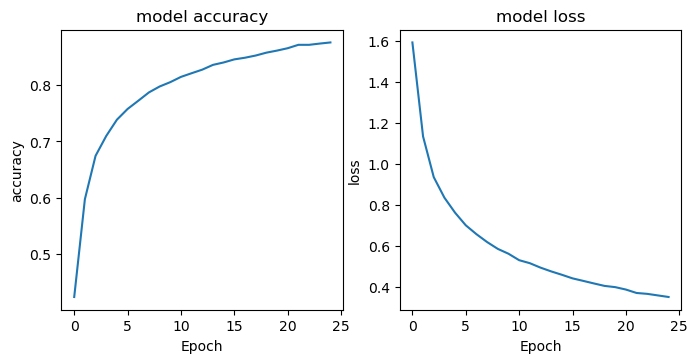

In [36]:
# plotting loss and accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("model accuracy")
plt.plot(hist.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.subplot(2,2,2)
plt.title("model loss")
plt.plot(hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")

1/1 [==============================] - 0s 20ms/step


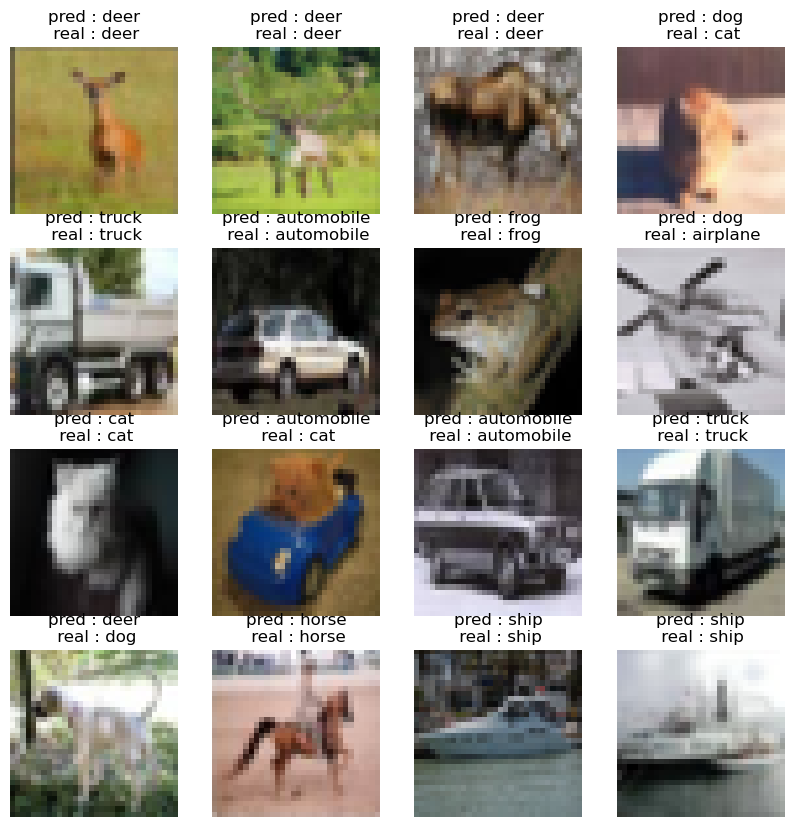

In [37]:
# predicting 16 random examples from the test set
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    index = randint(0, 9999)
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index])
    plt.axis("off")
    plt.title(
        label="pred : "
        + str(labels[np.argmax(model.predict(tf.expand_dims(X_test[index], 0)))])
        + "\n real : "
        + str(labels[y_test[index][0]])
    )

In [38]:
# predicting the entire test set to prepare a confusion matrix
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


<Axes: >

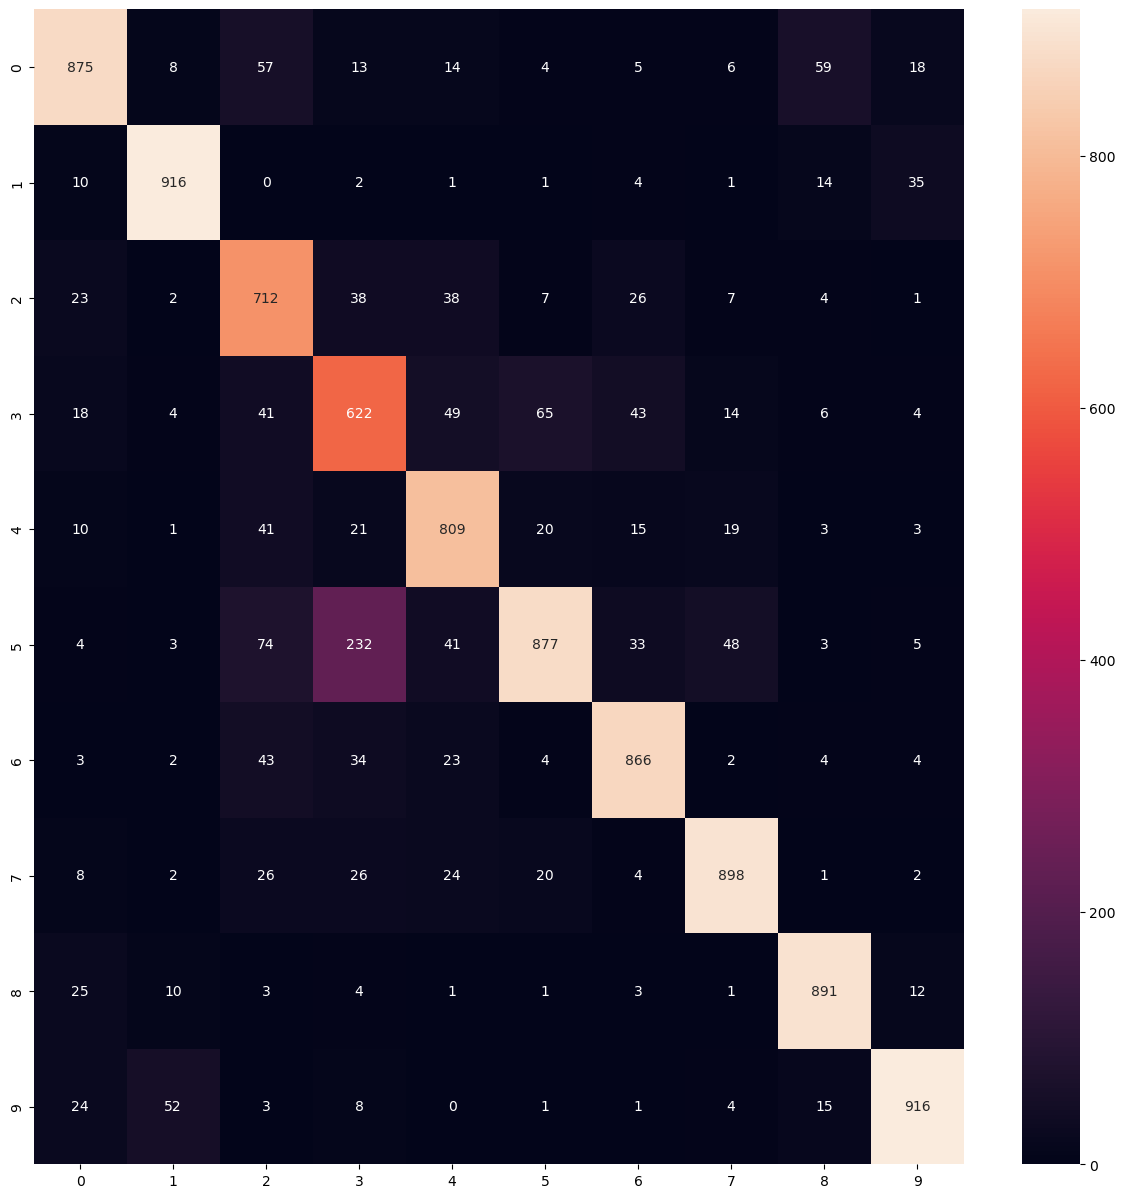

In [39]:
# confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d")

In [40]:
# overall model results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.93      0.92      0.92      1000
           2       0.83      0.71      0.77      1000
           3       0.72      0.62      0.67      1000
           4       0.86      0.81      0.83      1000
           5       0.66      0.88      0.76      1000
           6       0.88      0.87      0.87      1000
           7       0.89      0.90      0.89      1000
           8       0.94      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [42]:
# saving the model be careful not to overwrite a saved model if you're satisfied with it save it with another name
model.save("model_loss_0,5_accuracy_0,83.h5")
model.save("model_loss_0,5_accuracy_0,83.keras")